<a href="https://colab.research.google.com/github/Therezaclm/Bootcamp-D-Science/blob/main/Challenge_Probabilidade_e_Amostragem_Desafio_2_1_Entendendo_o_Consumidor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green>**BootCamp TECH MINAs 2023**</font>
# <font color=green>Challenge Probabilidade e Amostragem</font>

# <font color=blue>Desafio 1: Entendendo o Consumidor</font>



# <font color=purple>**SQUAD CARMEN PORTINHO **</font>
  # <font color=purple>Alunas:</font>
###            <font color=purple>Amanda Guimarães</font>
###            <font color=purple>Flávia Arruda</font>
###            <font color=purple>Júlia Bandeira</font>
###            <font color=purple>Lhaíslla Cavalcanti</font>
###            <font color=purple>Maria Layane</font>
###            <font color=purple>Nirvana Reis</font>
###            <font color=purple>Synnara Lima</font>
###            <font color=purple>Taciana Vasconcelos</font>
###            <font color=purple>Thaína Cordeiro</font>
###            <font color=purple>Thereza Melo</font>




# O DESAFIO
 

Suponha que você trabalha em uma empresa de produtos de beleza populares e, com a pandemia, você suspeita que o perfil de seus clientes mudou. O time de marketing,pediu a sua ajuda e gostaria de entender se: 
1. isso de fato aconteceu e 
2. quais as diferenças do novo perfil de clientes para o antigo, pois assim poderiam personalizar melhor os seus anúncios. 

Para isso, eles te enviaram a base de dados (desafio_01_consumidor.csv). Como você poderia ajudá-los?

#### Para responder esse desafio:

A base de dados: desafio_01_consumidor.csv contém informações de seus clientes (anonimizados) no período pré e pós pandemia. A coluna "pré-pandemia" indica se o dado é pré-pandemia ou não, sendo 1, caso positivo ou 0 caso negativo.

#### Dica / Passo a Passo:

1. Entenda a distribuição de variáveis como de idade / renda / regiao /produtos mais comprados antes e depois da pandemia

a. Identifique as distribuições

b. Plote histogramas / boxplots

2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia provar estatisticamente que essas diferenças são significativas ? (pergunta extra)

3. Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy.stats import norm
import math

In [ ]:
dados = pd.read_csv("desafio01consumidor-230209-165113.csv")
dados

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0
199,XXXXXXX50,43,10930,antissinais,Norte,0
200,XXXXXXX65,48,10246,perfume,Nordeste,0
201,XXXXXXX61,47,12337,batom,Sudeste,0


#### Primeiras análises do dataframe:

Usando o info() para imprimir as informações do dataframe (apesar desse comando já trazer muitas das informações que serão obtidas com os subsequentes métodos ou operações)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


Usando describe() para ter um resumo estatístico do dataframe

In [ ]:
dados.describe()

,idade,renda,pre-pandemia
count,203.000000,203.000000,203.000000
mean,42.403941,11586.364532,0.497537
std,14.400715,6288.016708,0.501230
min,15.000000,110.000000,0.000000
25%,31.000000,6705.000000,0.000000
50%,41.000000,11145.000000,0.000000
75%,53.000000,15590.500000,1.000000
max,80.000000,30000.000000,1.000000


Usando columns para imprimir as colunas existentes

In [ ]:
dados.columns

Index(['id_cliente', 'idade', 'renda', 'produto', 'regiao-BR', 'pre-pandemia'], dtype='object')

Usando dtypes para o tipo de dado de cada coluna

In [ ]:
dados.dtypes

id_cliente      object
idade            int64
renda            int64
produto         object
regiao-BR       object
pre-pandemia     int64
dtype: object

Contabilizando o número de células vazias por coluna

In [ ]:
dados.isna().sum()

id_cliente      0
idade           0
renda           0
produto         0
regiao-BR       0
pre-pandemia    0
dtype: int64

Usando shape para conhecer o tamanho do dataframe

In [ ]:
dados.shape

(203, 6)

Usando unique() conhecer os valores únicos das colunas

In [ ]:
dados['pre-pandemia'].unique()

array([1, 0])

In [ ]:
dados['produto'].unique()

array(['batom', 'desodorante', 'sombra', 'perfume', 'antissinais', 'base'],
      dtype=object)

In [ ]:
dados['regiao-BR'].unique()

array(['Sudeste', 'Nordeste', 'Centro-Oeste', 'Sul', 'Norte'],
      dtype=object)

Criando dois novos dataframes pré e pós pandemia

In [ ]:
pre_pandemia = dados[dados['pre-pandemia'] == 1]
pre_pandemia

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
...,...,...,...,...,...,...
96,XXXXXXX80,32,6251,antissinais,Norte,1
97,XXXXXXX92,43,2616,batom,Sul,1
98,XXXXXXX65,54,2324,antissinais,Norte,1
99,XXXXXXX79,61,12278,base,Centro-Oeste,1


In [ ]:
pos_pandemia = dados[dados['pre-pandemia'] == 0]
pos_pandemia

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
101,XXXXXXX67,35,25959,batom,Sul,0
102,XXXXXXX60,35,1995,desodorante,Nordeste,0
103,XXXXXXX48,53,23314,antissinais,Centro-Oeste,0
104,XXXXXXX67,44,16693,antissinais,Centro-Oeste,0
105,XXXXXXX59,37,14631,base,Nordeste,0
...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0
199,XXXXXXX50,43,10930,antissinais,Norte,0
200,XXXXXXX65,48,10246,perfume,Nordeste,0
201,XXXXXXX61,47,12337,batom,Sudeste,0


## 1.Entenda a distribuição de variáveis como de idade / renda / regiao /produtos mais comprados antes e depois da pandemia

### a. Identifique as distribuições

### b. Plote histogramas / boxplots

#### Quantificando os registros pré e pós pandemia

In [ ]:
frequencia = dados['pre-pandemia'].value_counts()
frequencia

0    102
1    101
Name: pre-pandemia, dtype: int64

normalizando o resultado

In [ ]:
percentual = dados['pre-pandemia'].value_counts(normalize = True).round(4) * 100
percentual

0    50.25
1    49.75
Name: pre-pandemia, dtype: float64

In [ ]:
dist_freq_qualitativa = pd.DataFrame({'frequencia': frequencia, 'porcentagem (%)': percentual})
dist_freq_qualitativa.rename(index = {0: 'pós pandemia', 1: 'pré pandemia'}, inplace = True)
dist_freq_qualitativa.rename_axis('Período', axis = 'columns', inplace  = True)
dist_freq_qualitativa

Período,frequencia,porcentagem (%)
pós pandemia,102,50.25
pré pandemia,101,49.75


<AxesSubplot:>

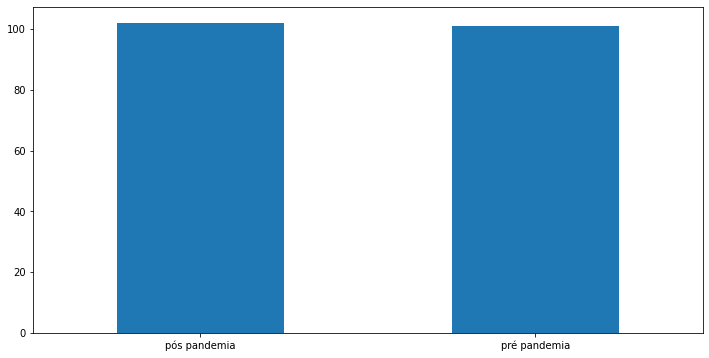

In [ ]:
dist_freq_qualitativa['frequencia'].plot.bar(figsize = (12,6), rot=0)

<AxesSubplot:>

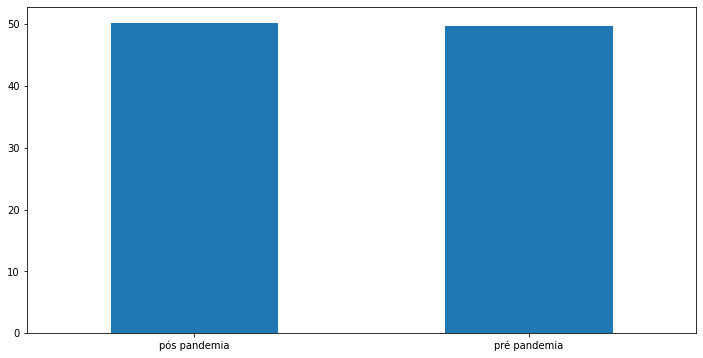

In [ ]:
dist_freq_qualitativa['porcentagem (%)'].plot.bar(figsize = (12,6), rot=0)

#### Analisando a região

In [ ]:
periodo = {
    0: 'pós pandemia',
    1: 'pré pandemia'
}

In [ ]:
frequencia = pd.crosstab(dados['pre-pandemia'], 
                         dados['regiao-BR'])
frequencia.rename(index = periodo, inplace = True)
frequencia.rename_axis('Período', axis = 'index', inplace  = True)
frequencia

regiao-BR,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Período,,,,,
pós pandemia,8,25,9,18,42
pré pandemia,17,26,8,21,29


<function matplotlib.pyplot.show(close=None, block=None)>

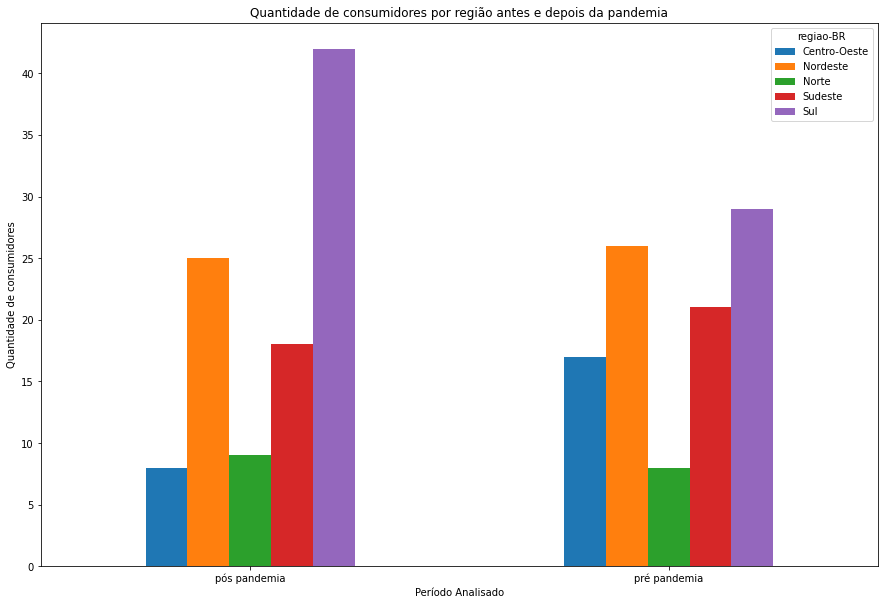

In [ ]:
frequencia.plot.bar(figsize = (15,10), rot=0)
plt.xlabel("Período Analisado")
plt.ylabel("Quantidade de consumidores")
plt.title("Quantidade de consumidores por região antes e depois da pandemia")
plt.show

#### Analisando os produtos

In [ ]:
frequencia_P = pd.crosstab(dados['pre-pandemia'], 
                           dados['produto'])
frequencia_P.rename(index = periodo, inplace = True)
frequencia_P.rename_axis('Período', axis = 'index', inplace  = True)
frequencia_P 

produto,antissinais,base,batom,desodorante,perfume,sombra
Período,,,,,,
pós pandemia,20,4,15,46,8,9
pré pandemia,9,3,61,20,4,4


<function matplotlib.pyplot.show(close=None, block=None)>

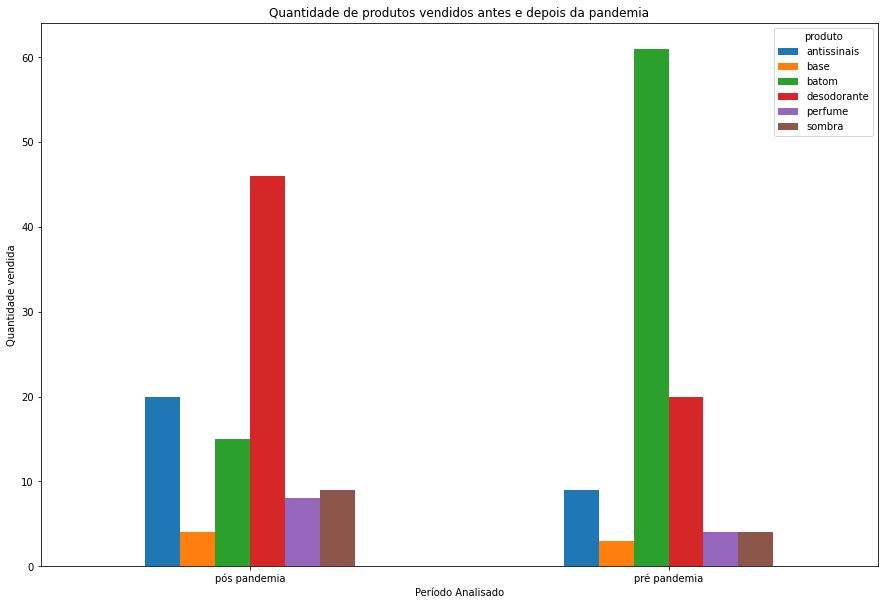

In [ ]:
frequencia_P.plot.bar(figsize = (15,10), rot=0)
plt.xlabel("Período Analisado")
plt.ylabel("Quantidade vendida")
plt.title("Quantidade de produtos vendidos antes e depois da pandemia")
plt.show

#### Analisando as idades

Analisando o conjunto como um todo

In [ ]:
mais_velho = dados['idade'].max()
mais_novo = dados['idade'].min()
media_idade = dados['idade'].mean()
mediana_idade = dados['idade'].median()
moda_idade = dados['idade'].mode()
desvio_padrao_idade = dados['idade'].std()

print("ANÁLISES DOS DADOS GERAIS:\n")
print(f'A idade da pessoa mais velha é {mais_velho} anos')
print(f'A idade da pessoa mais nova é {mais_novo} anos')
print(f'A média das idades de todas as pessoas é {media_idade:.2f} anos')
print(f'A mediana das idades de todas as pessoa é {mediana_idade} anos')
print(f'O desvio padrão das idades das pessoas é {desvio_padrao_idade:.2f} anos')
print("A Moda das idades %i" % moda_idade)

ANÁLISES DOS DADOS GERAIS:

A idade da pessoa mais velha é 80 anos
A idade da pessoa mais nova é 15 anos
A média das idades de todas as pessoas é 42.40 anos
A mediana das idades de todas as pessoa é 41.0 anos
O desvio padrão das idades das pessoas é 14.40 anos
A Moda das idades 37


Analisando pré-pandemia 

In [ ]:
mais_velho_p = pre_pandemia['idade'].max()
mais_novo_p = pre_pandemia['idade'].min()
media_idade_p = pre_pandemia['idade'].mean()
mediana_idade_p = pre_pandemia['idade'].median()
desvio_padrao_idade_p = pre_pandemia['idade'].std()

print("ANÁLISES DOS DADOS PRE PANDEMIA:\n")
print(f'A idade da pessoa mais velha é {mais_velho_p} anos')
print(f'A idade da pessoa mais nova é {mais_novo_p} anos')
print(f'A média das idades de todas as pessoas é {media_idade_p:.2f} anos')
print(f'A mediana das idades de todas as pessoa é {mediana_idade_p} anos')
print(f'O desvio padrão das idades das pessoas é {desvio_padrao_idade_p:.2f} anos')

ANÁLISES DOS DADOS PRE PANDEMIA:

A idade da pessoa mais velha é 80 anos
A idade da pessoa mais nova é 16 anos
A média das idades de todas as pessoas é 39.88 anos
A mediana das idades de todas as pessoa é 37.0 anos
O desvio padrão das idades das pessoas é 15.02 anos


Analisando pós-pandemia 

In [ ]:
mais_velho_pp = pos_pandemia['idade'].max()
mais_novo_pp = pos_pandemia['idade'].min()
media_idade_pp = pos_pandemia['idade'].mean()
mediana_idade_pp = pos_pandemia['idade'].median()
desvio_padrao_idade_pp = pos_pandemia['idade'].std()

print("ANÁLISES DOS DADOS PÓS PANDEMIA:\n")
print(f'A idade da pessoa mais velha é {mais_velho_pp} anos')
print(f'A idade da pessoa mais nova é {mais_novo_pp} anos')
print(f'A média das idades de todas as pessoas é {media_idade_pp:.2f} anos')
print(f'A mediana das idades de todas as pessoa é {mediana_idade_pp} anos')
print(f'O desvio padrão das idades das pessoas é {desvio_padrao_idade_pp:.2f} anos')

ANÁLISES DOS DADOS PÓS PANDEMIA:

A idade da pessoa mais velha é 77 anos
A idade da pessoa mais nova é 15 anos
A média das idades de todas as pessoas é 44.90 anos
A mediana das idades de todas as pessoa é 46.0 anos
O desvio padrão das idades das pessoas é 13.37 anos


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

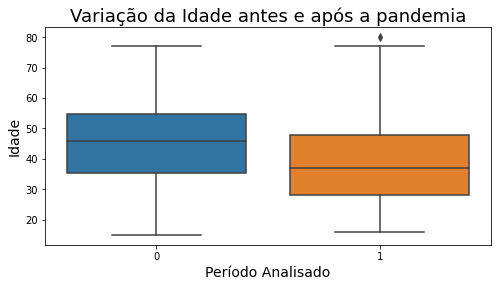

In [ ]:
ax = sns.boxplot(x='pre-pandemia', y = 'idade', data = dados)
ax.set_title('Variação da Idade antes e após a pandemia', fontsize=18)
ax.set_xlabel('Período Analisado', fontsize=14)
ax.set_ylabel('Idade', fontsize=14)
ax.figure.set_size_inches(8, 4)
plt.xticks(rotation = 0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='idade', ylabel='Density'>

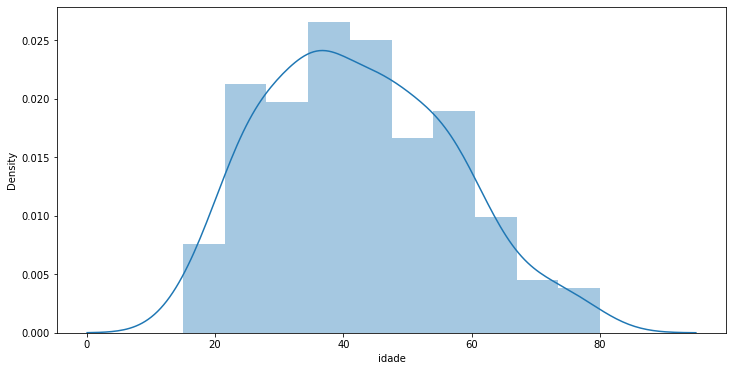

In [ ]:
ax = sns.distplot(dados['idade'], bins=10)
ax.figure.set_size_inches(12,6)
ax

#### Analisando a renda

In [ ]:
maior_renda= dados[dados['pre-pandemia'] == 1]['renda'].max()
maior_renda

24090

Analisando o conjunto como um todo

In [ ]:
maior_renda = dados['renda'].max()
menor_renda = dados['renda'].min()
renda_media = dados['renda'].mean()
renda_mediana = dados['renda'].median()
desvio_padrao_renda = dados['renda'].std()

print("ANÁLISES DOS DADOS GERAIS:\n")
print(f'A maior renda é {maior_renda} reais')
print(f'A menor renda é {menor_renda} reais')
print(f'A renda média é {renda_media:.2f} reais')
print(f'A mediana das rendas é {renda_mediana} reais')
print(f'O desvio padrão das rendas é {desvio_padrao_renda:.2f} reais')

ANÁLISES DOS DADOS GERAIS:

A maior renda é 30000 reais
A menor renda é 110 reais
A renda média é 11586.36 reais
A mediana das rendas é 11145.0 reais
O desvio padrão das rendas é 6288.02 reais


Analisando os dados de renda pré pandemia

In [ ]:
maior_renda_p = pre_pandemia['renda'].max()
menor_renda_p = pre_pandemia['renda'].min()
renda_media_p = pre_pandemia['renda'].mean()
renda_mediana_p = pre_pandemia['renda'].median()
desvio_padrao_renda_p = pre_pandemia['renda'].std()

print("ANÁLISES DOS DADOS PRE PANDEMIA:\n")
print(f'A maior renda é {maior_renda_p} reais')
print(f'A menor renda é {menor_renda_p} reais')
print(f'A renda média é  {renda_media_p:.2f} reais')
print(f'A mediana das rendas é {renda_mediana_p} reais')
print(f'O desvio padrão das rendas é {desvio_padrao_renda_p:.2f} reais')

ANÁLISES DOS DADOS PRE PANDEMIA:

A maior renda é 24090 reais
A menor renda é 110 reais
A renda média é  9180.64 reais
A mediana das rendas é 7488.0 reais
O desvio padrão das rendas é 6007.68 reais


Analisando os dados de renda pós pandemia

In [ ]:
maior_renda_pp = pos_pandemia['renda'].max()
menor_renda_pp = pos_pandemia['renda'].min()
renda_media_pp = pos_pandemia['renda'].mean()
renda_mediana_pp = pos_pandemia['renda'].median()
desvio_padrao_renda_pp = pos_pandemia['renda'].std()

print("ANÁLISES DOS DADOS POS PANDEMIA:\n")
print(f'A maior renda é {maior_renda_pp} reais')
print(f'A menor renda é {menor_renda_pp} reais')
print(f'A renda média é  {renda_media_pp:.2f} reais')
print(f'A mediana das rendas é {renda_mediana_pp} reais')
print(f'O desvio padrão das rendas é {desvio_padrao_renda_pp:.2f} reais')

ANÁLISES DOS DADOS POS PANDEMIA:

A maior renda é 30000 reais
A menor renda é 1995 reais
A renda média é  13968.50 reais
A mediana das rendas é 13380.5 reais
O desvio padrão das rendas é 5641.38 reais


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

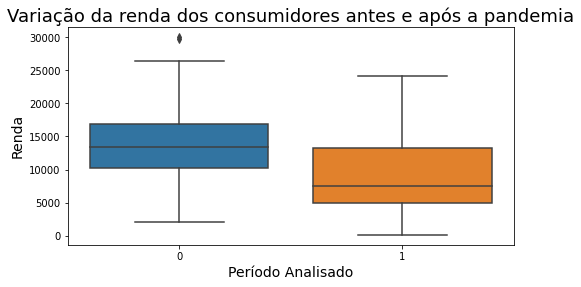

In [ ]:
ax = sns.boxplot(x='pre-pandemia', y = 'renda', data = dados)
ax.set_title('Variação da renda dos consumidores antes e após a pandemia', fontsize=18)
ax.set_xlabel('Período Analisado', fontsize=14)
ax.set_ylabel('Renda', fontsize=14)
ax.figure.set_size_inches(8, 4)
plt.xticks(rotation = 0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='renda', ylabel='Density'>

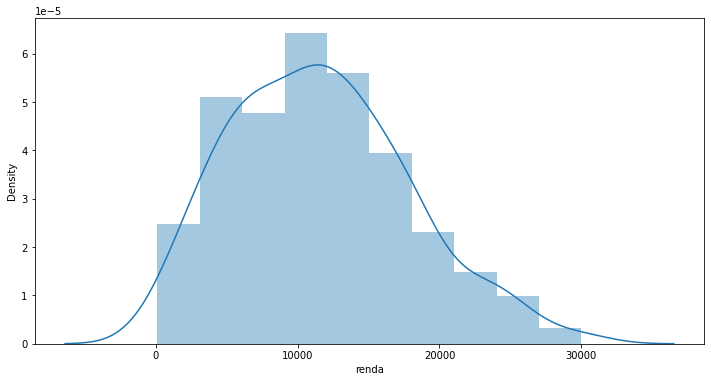

In [ ]:
ax = sns.distplot(dados['renda'], bins=10)
ax.figure.set_size_inches(12,6)
ax

# 2 - Você notou diferenças nítidas pré e pós pandemia? Como você poderia provar estatisticamente que essas diferenças são significativas ? 

# <font color=green>Resposta da quetão:</font>

<font color=green>Em termos de quantidade, não houve alteração significativa na quantidade vendida antes e depois da pandemia.
Região:
Antes da pandemia, não tinha nenhuma região com um consumo mais acentuado comparada às demais, porém após a pandemia, a região Sul passou a ter um papel muito mais acentuado comparado as demais
Produtos:
Antes da pandemia, o produto mais vendido era o batom, e após a pandemia passou a ser o desodorante, seguido dos antissinais e pelo batom
Renda: a renda média dos consumidores pós pandemia aumentou, e a dispersão foi menor
Idade: a idade média pós pandemia aumentou em comparação a média pré pandemia</font>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='renda', ylabel='Density'>

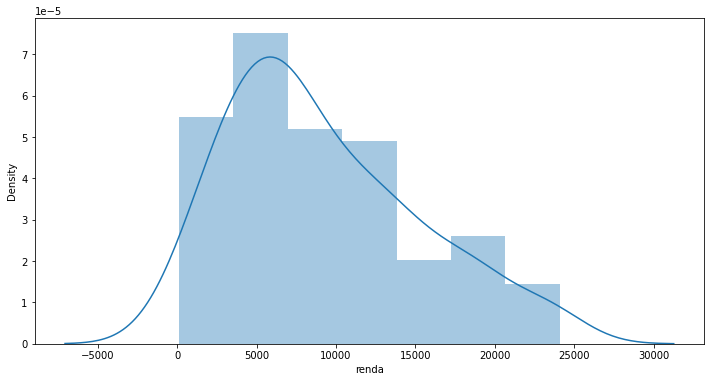

In [ ]:
ax = sns.distplot(pre_pandemia['renda'])
ax.figure.set_size_inches(12,6)
ax

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='renda', ylabel='Density'>

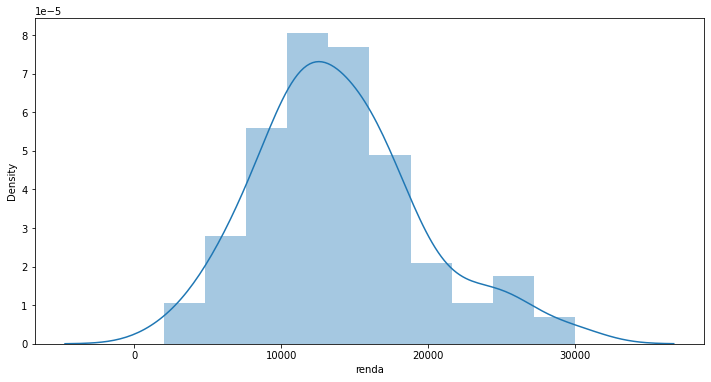

In [ ]:
ax = sns.distplot(pos_pandemia['renda'])
ax.figure.set_size_inches(12,6)
ax

## 3 - Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

Observações:

O desvio padrão ( σ ou s ) e o erro ( e ) devem estar na mesma unidade de medida.

Quando o erro ( e ) for representado em termos percentuais, deve ser interpretado como um percentual relacionado à média.

In [ ]:
N = 100000
N

100000

Para 95% de confiança

In [ ]:
z = norm.ppf(0.975)
z

1.959963984540054

Analisando apenas a parte da renda, tem-se 

In [ ]:
media_renda = round(pre_pandemia['renda'].mean(), 2)
std_renda = round(pre_pandemia['renda'].std(), 2)
print(f"Média pré pandemia {media_renda}, desvio padrão pré pandemia {std_renda}")

Média pré pandemia 9180.64, desvio padrão pré pandemia 6007.68


Analisando apenas a parte da idade, tem-se

In [ ]:
media_idade = round(pre_pandemia['idade'].mean(), 2)
std_idade = round(pre_pandemia['idade'].std(), 2)
print(f"Média pré pandemia {media_idade}, desvio padrão pré pandemia {std_idade}")

Média pré pandemia 39.88, desvio padrão pré pandemia 15.02


In [ ]:
s_renda = std_renda
s_renda

6007.68

Erro, percentual da média, 2% da média da renda

In [ ]:
e2 = 0.02 * media_renda
e2

183.6128

Erro, percentual da média, 10% da média da renda

In [ ]:
e10 = 0.1 * media_renda
e10

918.064

In [ ]:
s_idade = std_idade
s_idade

15.02

Erro, percentual da média, 2% da média da idade

In [ ]:
e2_id = 0.02 * media_idade
e2_id

0.7976000000000001

Erro, percentual da média, 10% da média da idade

In [ ]:
e10_id = 0.1 * media_idade
e10_id

3.9880000000000004

In [ ]:
def tamanho_amostra(N, z, s, e):
  n = ((z**2) * (s**2) * N) / (((z**2) * (s**2))  + ((e**2) * (N - 1) ))
  n_int = int(n.round())
  return n_int

In [ ]:
amostra_2_erro = tamanho_amostra(N, z, s_renda, e2)
print(f"Para 2% de margem de erro, o tamanho da amostra deve ser de {amostra_2_erro}")

Para 2% de margem de erro, o tamanho da amostra deve ser de 3950


In [ ]:
amostra_10_erro = tamanho_amostra(N, z, s_renda, e10)
print(f"Para 10% de margem de erro, o tamanho da amostra deve ser de {amostra_10_erro}")

Para 10% de margem de erro, o tamanho da amostra deve ser de 164


In [ ]:
amostra_2_erro_id = tamanho_amostra(N, z, s_idade, e2_id)
print(f"Para 10% de margem de erro, baseado na idade, o tamanho da amostra deve ser de {amostra_2_erro_id}")

Para 10% de margem de erro, baseado na idade, o tamanho da amostra deve ser de 1344


In [ ]:
amostra_10_erro_id = tamanho_amostra(N, z, s_idade, e10_id)
print(f"Para 10% de margem de erro, baseado na idade, o tamanho da amostra deve ser de {amostra_10_erro_id}")

Para 10% de margem de erro, baseado na idade, o tamanho da amostra deve ser de 54


Considerando a fórmula para o cálculo do tamanho da amostra:

In [ ]:
def tamanho_amostra(N, E):
  n0 = np.array([((N * (1/(e**2))) / (N + ( 1/(e**2) ))) for e in E]) 
  return n0

In [ ]:
N = 100000
N

100000

In [ ]:
lista_e = np.array([x for x in range(1, 101, 1)]) / 100
lista_e

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [ ]:
lista_n = tamanho_amostra(N, lista_e)
lista_n = lista_n.astype(int)
lista_n

array([9090, 2439, 1098,  621,  398,  277,  203,  156,  123,   99,   82,
         69,   59,   50,   44,   39,   34,   30,   27,   24,   22,   20,
         18,   17,   15,   14,   13,   12,   11,   11,   10,    9,    9,
          8,    8,    7,    7,    6,    6,    6,    5,    5,    5,    5,
          4,    4,    4,    4,    4,    3,    3,    3,    3,    3,    3,
          3,    3,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          0])

In [ ]:
tam_amostra = {'Erro': lista_e, 'Tamanho': lista_n}
tam_amostra_df = pd.DataFrame(data=tam_amostra)
tam_amostra_df

,Erro,Tamanho
0,0.01,9090
1,0.02,2439
2,0.03,1098
3,0.04,621
4,0.05,398
...,...,...
95,0.96,1
96,0.97,1
97,0.98,1
98,0.99,1


<AxesSubplot:xlabel='Erro', ylabel='Tamanho'>

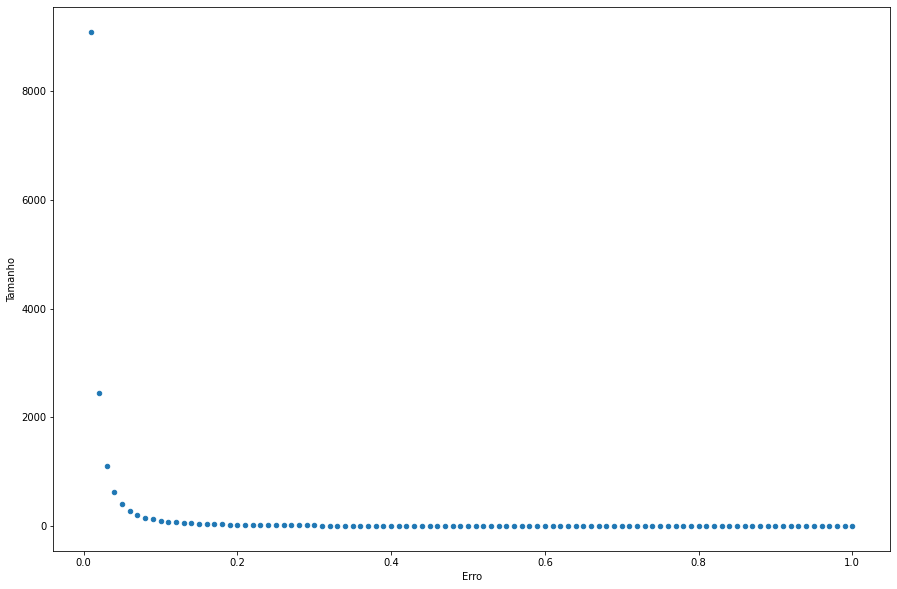

In [ ]:
from IPython.core.pylabtools import figsize
tam_amostra_df.plot(x = 'Erro', y = 'Tamanho', kind = 'scatter', figsize=(15,10))